In [ ]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai2](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:
```
pip install -e .
```

## How to use

In [ ]:
from fastai2.basics import *
from fastseq.all import *
from fastseq.nbeats.model import *
from fastseq.nbeats.learner import *
horizon, lookback = 7, 35    

In [ ]:
import time
time.sleep(60*30)

KeyboardInterrupt: 

Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
data = TSDataLoaders.from_folder(path, horizon = horizon, lookback = lookback, nrows = 300, step=3, max_std=1.5)

torch.Size([1, 1020])
Train:70707; Valid: 1200; Test 300


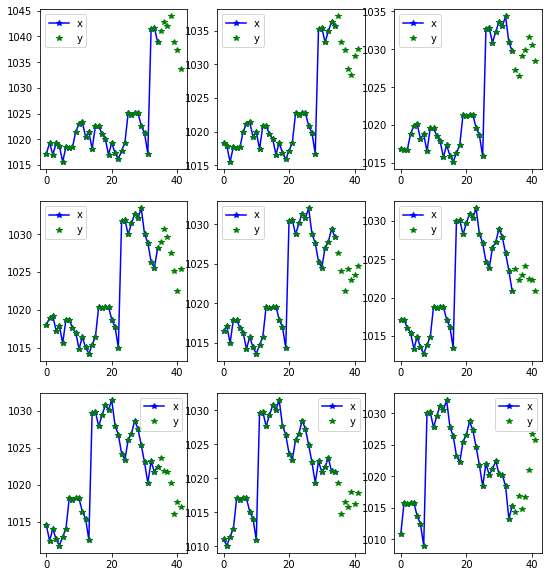

In [ ]:
data.show_batch()

In [ ]:
from fastseq.nbeats.callbacks import *
learn = nbeats_learner(data, cbs=ClipLoss(20), season = lookback+horizon)   

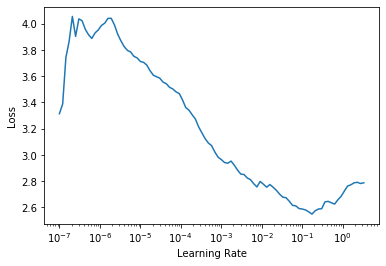

In [ ]:
from fastai2.callback.all import *
learn.lr_find()

In [ ]:
learn.fit_flat_cos(20, 2e-2)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

KeyboardInterrupt: 

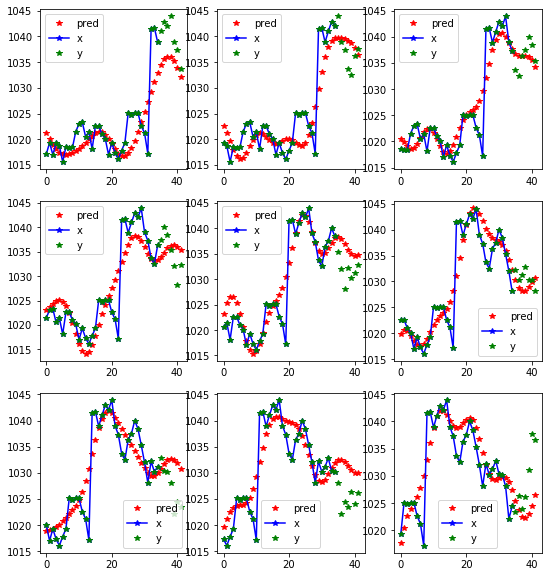

In [ ]:
learn.show_results(0)

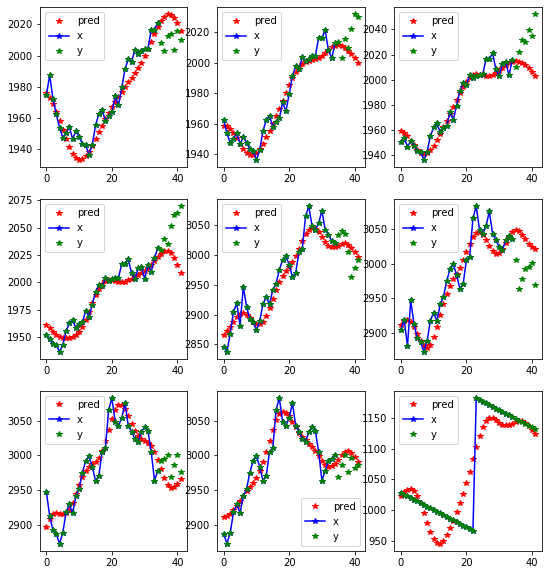

In [ ]:
learn.show_results(1)

In [ ]:
learn.fit_flat_cos(5,5e-4)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

KeyboardInterrupt: 

## Interperation

In [ ]:
learn.n_beats_attention.means()

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

In [ ]:
# hide
from fastai2.interpret import *
from fastseq.nbeats.interpret import *

In [ ]:
# hide
interp = NBeatsInterpretation.from_learner(learn)

RuntimeError: The size of tensor a (35) must match the size of tensor b (0) at non-singleton dimension 2

In [ ]:
# hide
interp.plot_top_losses(3, combine_stack=True)